In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, ifft, ifftshift, rfft
import warnings
warnings.filterwarnings("ignore")

#### Defining Parameters

In [81]:
numtaps = 2001
band_width = 5000 #Hz
sampling_rate = 204800 #Hz
num_samples = 2001
frequency_central = 10000


#### Loading data

In [83]:
data_path =  r"..\data\avstand_1.npz"
data = np.load(data_path)['data']
s1 = data[0][:num_samples]
s2 = data[1][:num_samples]

noise_path = r"..\data\avstand_1_noise.npz"
data_noise = np.load(noise_path)['data']
q1 = data_noise[0][:num_samples]
q2 = data_noise[1][:num_samples]

mean = 0
std = 1
w1 = np.random.normal(mean, std, size=num_samples)
w2 = np.random.normal(mean, std, size=num_samples)

#### Generating filter

In [84]:
filter_coefficients = signal.firwin(numtaps, 
                                    [frequency_central - band_width//2, frequency_central + band_width//2], 
                                    fs=sampling_rate, 
                                    pass_zero="bandpass")

#### Calculating Impulse Response of the system

In [86]:
impulse = np.zeros(num_samples) 
impulse[0] = 1  
h = signal.lfilter(filter_coefficients, 1, impulse)  # Apply the filter to the impulse signal


#### Definerer enkel krysskorrelasjon

In [87]:
def CC(x, y, beta):

    window = signal.windows.boxcar(len(x))
    s1 = x * window
    s2 = y * window
    
    f_s1 = fft(s1)
    f_s2 = fft(s2)

    G12 = f_s1 * np.conj(f_s2)
    denom = abs(G12)
    denom[denom < 1e-6] = 1e-6

    f_s = G12 / denom**beta
    cc12 = ifft(f_s)
    cc12 = ifftshift(cc12)
    cc12 = cc12/np.max(np.abs(cc12))
    return cc12

##### Plotting Functions

In [98]:
def plotting_signal(s1, 
                s1_filt, 
                h, 
                s1_title, 
                s1_filt_title,
                h_title):
    
    '''
    Inputs: 
    s1: array-like
    s1_filt: array-like
    h: array-like

    s1_title: str
    s1_filt_title: str
    h_title: str

    beta: float

    '''

    fig, ax = plt.subplots(3, 1, figsize=(10,5))
    ax = ax.ravel()

    ax[0].plot(s1)
    ax[0].set_title(f"{s1_title}")
    ax[0].set_xlabel("Samples")
    ax[0].set_ylabel("Amplitude")

    ax[1].plot(s1_filt)
    ax[1].set_title(f"{s1_filt_title}")
    ax[1].set_xlabel("Samples")
    ax[1].set_ylabel("Amplitude")

    ax[2].plot(h)
    ax[2].set_title(f"{h_title}")
    ax[2].set_xlabel("Samples")
    ax[2].set_ylabel("Amplitude")

    fig.suptitle(f"{s1_title}, {s1_filt_title} and {h_title}")
    fig.tight_layout()
def plotting_cc(s1, 
                s1_filt, 
                h, 
                s1_title, 
                s1_filt_title,
                h_title,
                beta):
    
    
    fig, ax = plt.subplots(3, 3, figsize=(10,10))
    ax = ax.ravel()

    cc_s1_s1 = CC(s1, s1, beta)
    cc_s1_s1_filt = CC(s1, s1_filt, beta)
    cc_s1_h = CC(s1, h, beta)

    cc_s1_filt_s1 = CC(s1_filt, s1, beta)
    cc_s1_filt_h = CC(s1_filt, h, beta)
    cc_s1_filt_s1_filt = CC(s1_filt, s1_filt, beta)

    cc_h_s1 = CC(h, s1, beta)
    cc_h_s1_filt = CC(h, s1_filt, beta)

    cc_h_h = CC(h, h, beta)


    ax[0].plot(cc_s1_s1)
    ax[0].set_title(f"corr({s1_title},{s1_title})")

    ax[1].plot(cc_s1_s1_filt)
    ax[1].set_title(f"corr({s1_title},{s1_filt_title})")

    ax[2].plot(cc_s1_h)
    ax[2].set_title(f"corr({s1_title},{h_title})")

    ax[3].plot(cc_s1_filt_s1)   
    ax[3].set_title(f"corr({s1_filt_title},{s1_title})")

    ax[4].plot(cc_s1_filt_s1_filt)
    ax[4].set_title(f"corr({s1_filt_title},{s1_filt_title})")

    ax[5].plot(cc_s1_filt_h)
    ax[5].set_title(f"corr({s1_filt_title},{h_title})")

    ax[6].plot(cc_h_s1)
    ax[6].set_title(f"corr({h_title},{s1_title})")

    ax[7].plot(cc_h_s1_filt)
    ax[7].set_title(f"corr({h_title},{s1_filt_title})")

    ax[8].plot(cc_h_h)
    ax[8].set_title(f"corr({h_title},{h_title})")

    ax[0].set_ylim(-1,1)
    ax[1].set_ylim(-1,1)
    ax[2].set_ylim(-1,1)
    ax[3].set_ylim(-1,1)
    ax[4].set_ylim(-1,1)
    ax[5].set_ylim(-1,1)
    ax[6].set_ylim(-1,1)
    ax[7].set_ylim(-1,1)
    ax[8].set_ylim(-1,1)

    fig.suptitle(f"Cross correlation {s1_title}, {s1_filt_title} and {h_title}")
    fig.tight_layout()
def plotting_auto_corr(a,
                       b, 
                       c, 
                       d, 
                       a_title,
                       b_title,
                       c_title,
                       d_title,
                       beta):
    
    fig, ax = plt.subplots(4,1, figsize=(10,5), sharey = True, sharex = True )
    ax = ax.ravel()

    cc_a_a = CC(a, a, beta)
    cc_b_b = CC(b, b, beta)
    cc_c_c = CC(c, c, beta)
    cc_d_d = CC(d, d, beta)

    ax[0].plot(cc_a_a)
    ax[0].set_title(f"corr({a_title},{a_title})")

    ax[1].plot(cc_b_b)
    ax[1].set_title(f"corr({b_title},{b_title})")

    ax[2].plot(cc_c_c)
    ax[2].set_title(f"corr({c_title},{c_title})")

    ax[3].plot(cc_d_d)
    ax[3].set_title(f"corr({d_title},{d_title})")

    ax[0].set_ylim(-1,1)
    ax[1].set_ylim(-1,1)
    ax[2].set_ylim(-1,1)
    ax[3].set_ylim(-1,1)

    fig.suptitle(f"Auto correlation {a_title}, {b_title}, {c_title} and {d_title}")
    fig.tight_layout()


#### Plotting the auto correlation

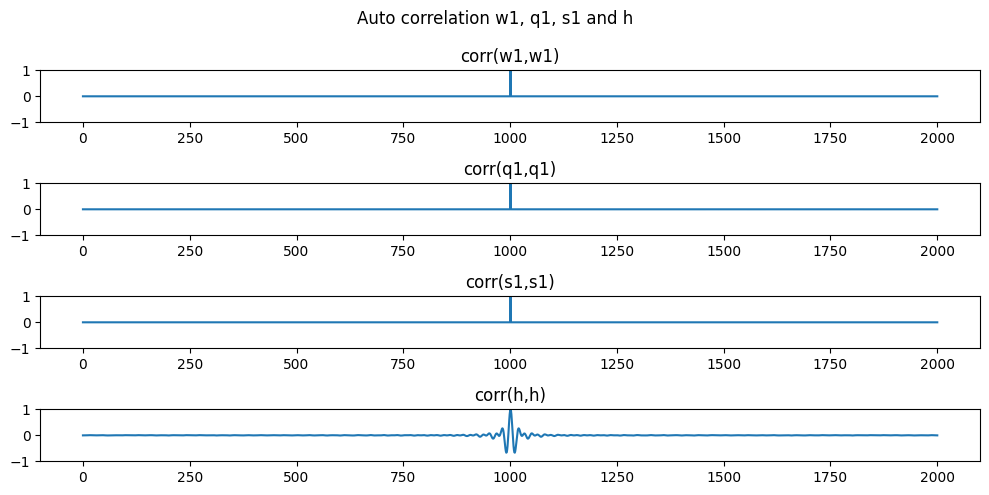

In [99]:
plotting_auto_corr(w1, q1, s1, h, "w1", "q1", "s1", "h", 1)

#### Regner ut filterets effect på s1 signal

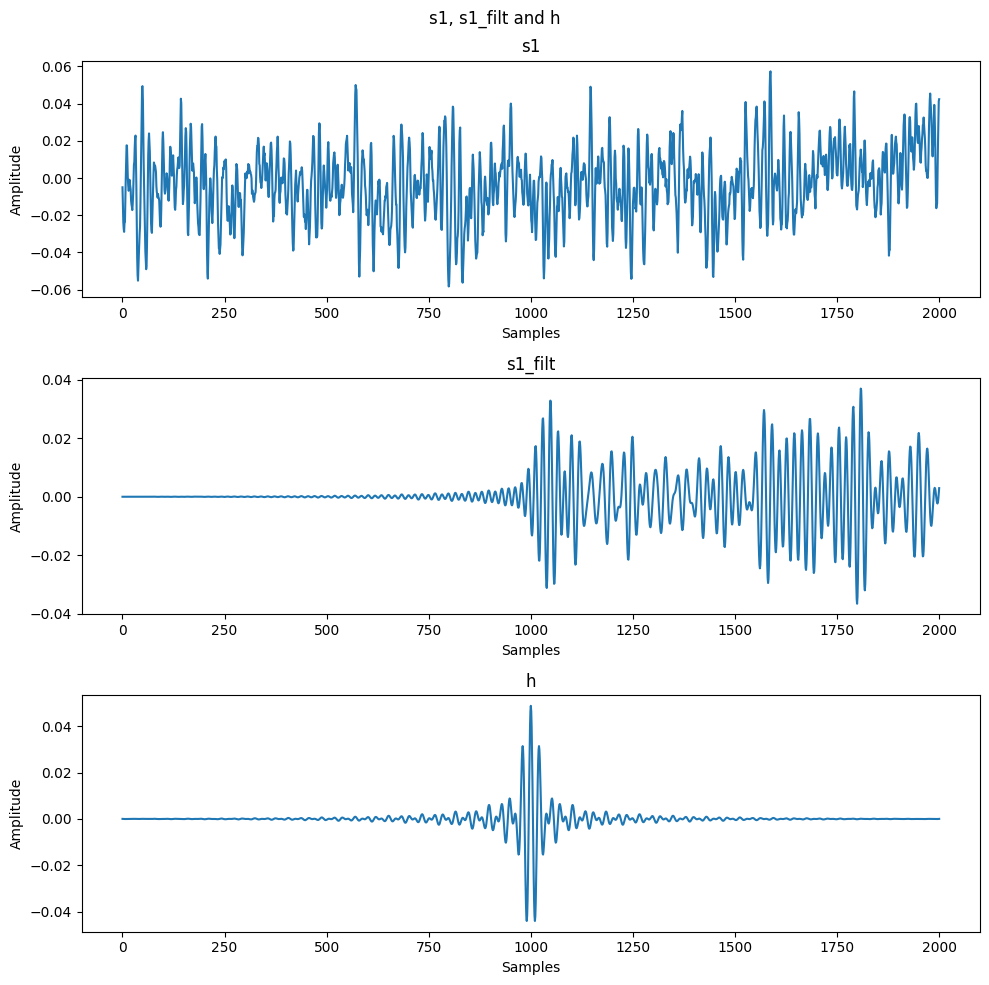

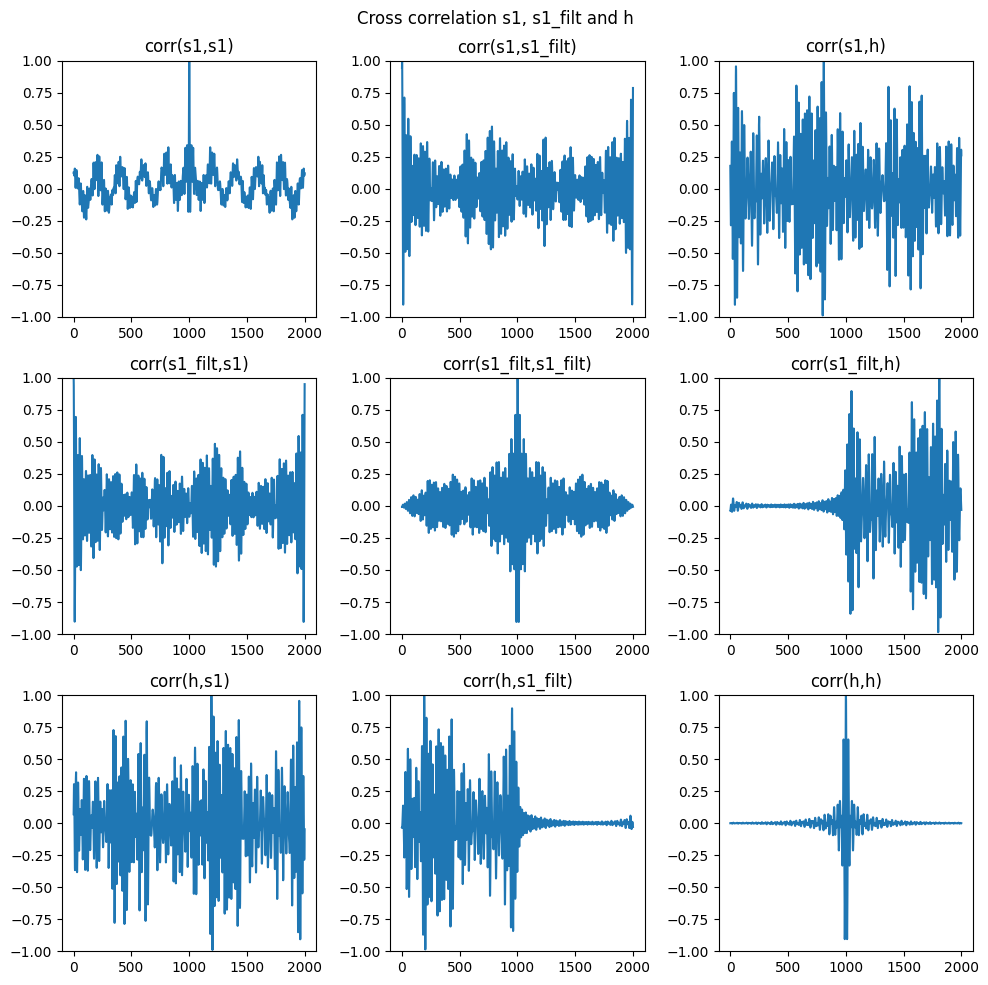

In [78]:

beta = 0
s1_filt = signal.lfilter(filter_coefficients, 1, s1)

plotting_cc(s1, s1_filt, h, "s1", "s1_filt", "h", beta)


#### Looking at the noise

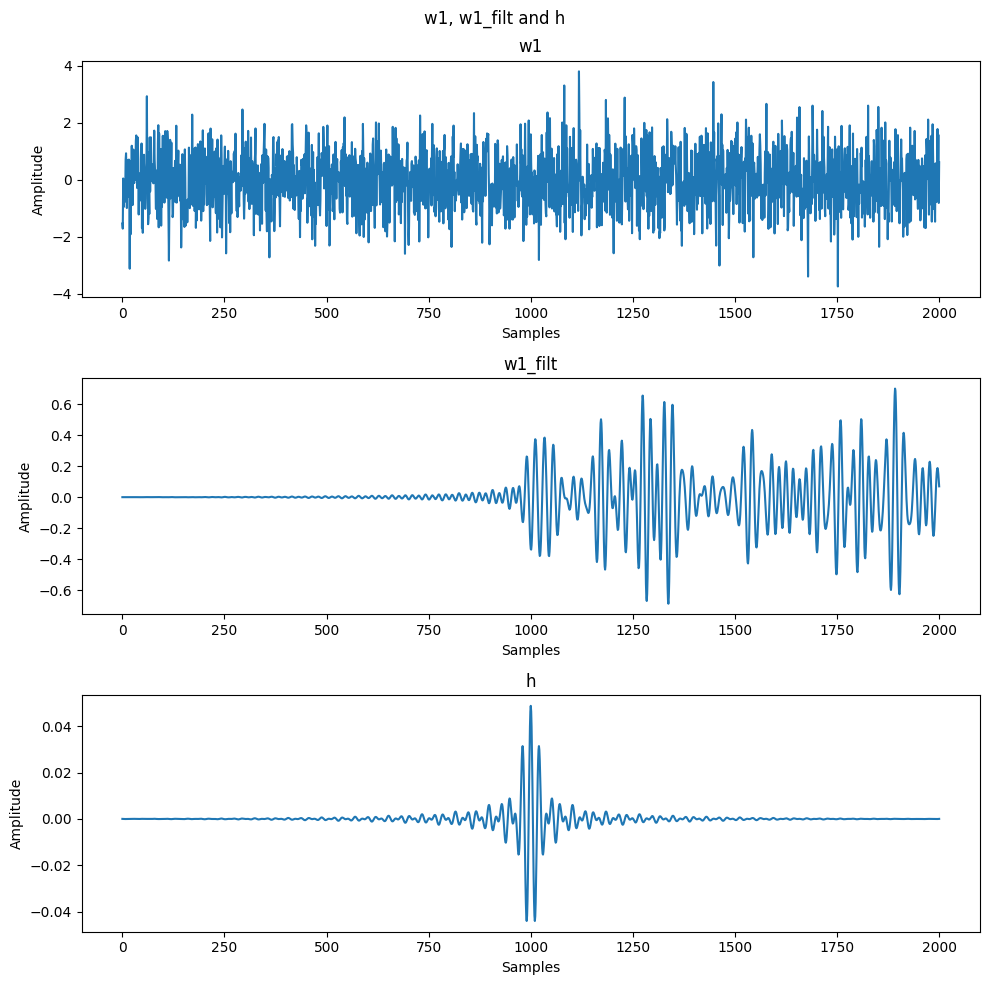

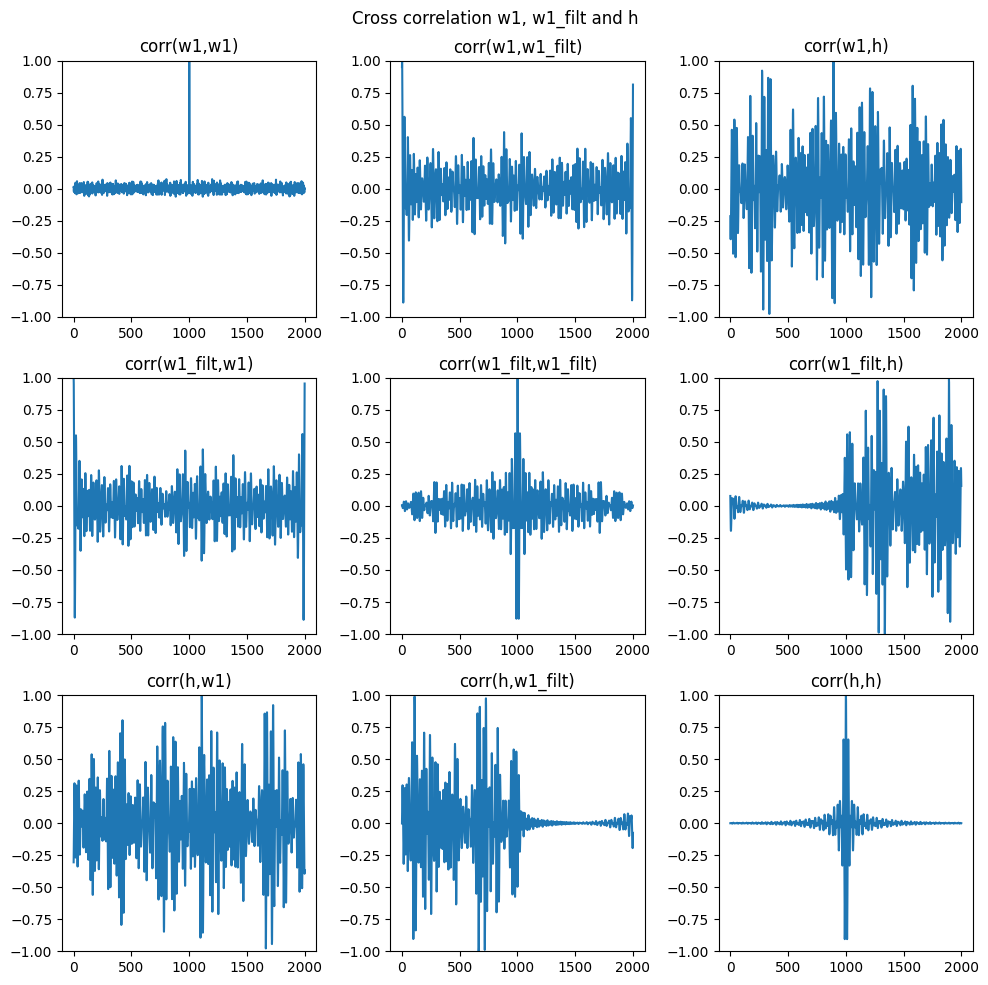

In [79]:
beta = 0
w1 = w1
w1_filt = signal.lfilter(filter_coefficients, 1, w1)
h = impulse_response
plotting_cc(w1, w1_filt, h, "w1", "w1_filt", "h", beta)


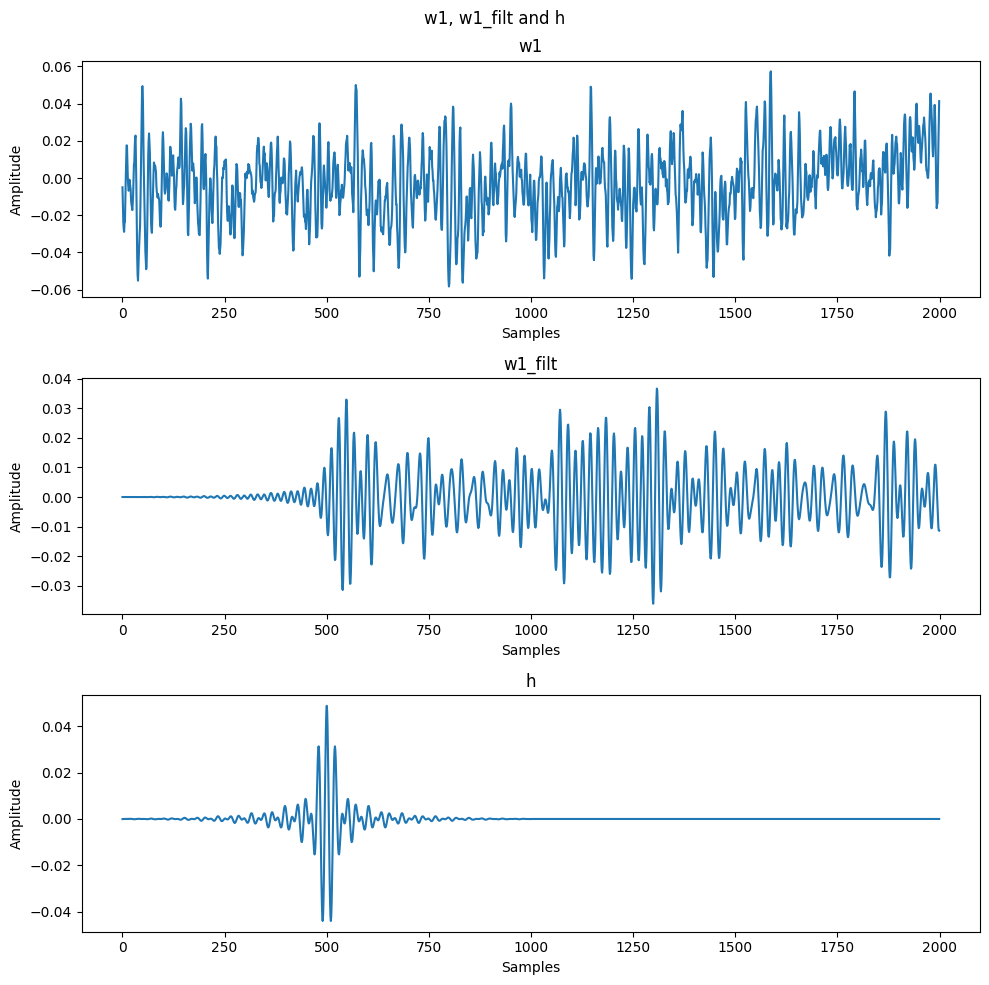

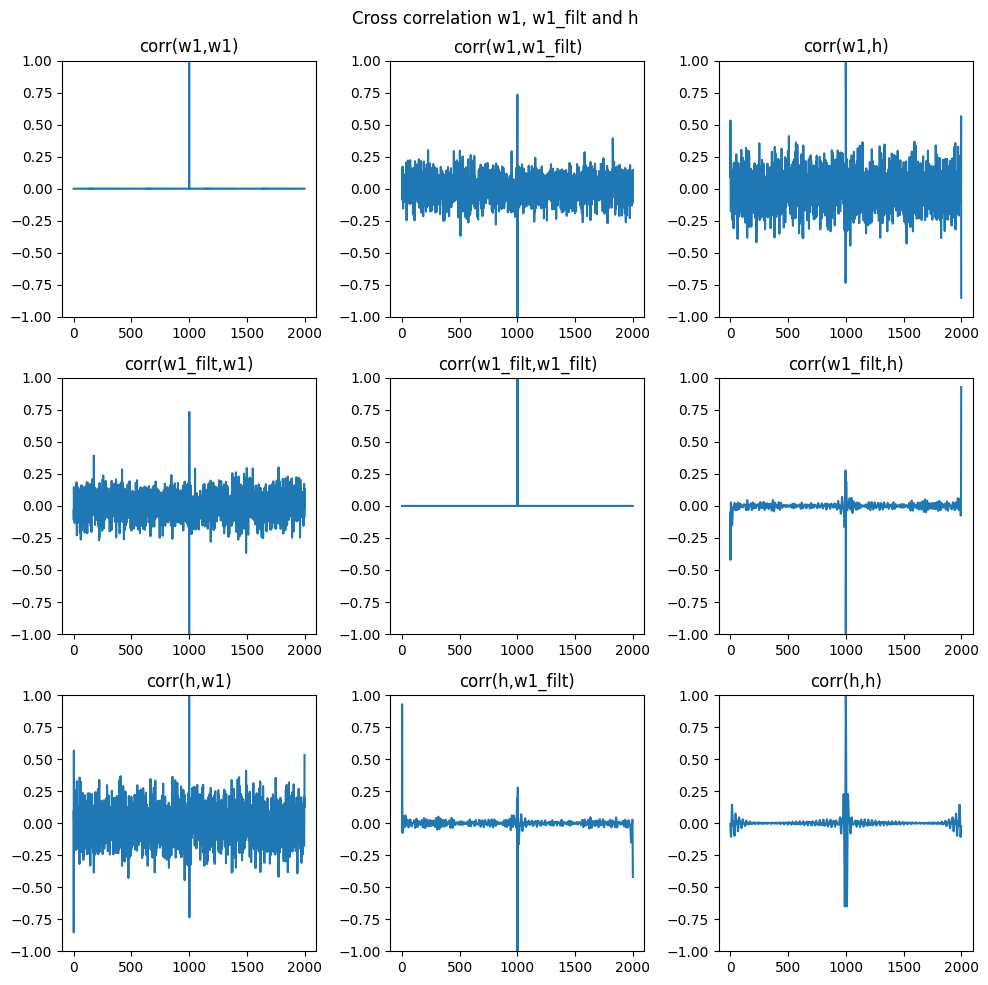

In [69]:
beta = 1
w1 = sensor_1 
w1_filt = signal.lfilter(filter_coefficients, 1, w1)
h = impulse_response
plotting_cc(w1, w1_filt, h, "w1", "w1_filt", "h", beta)


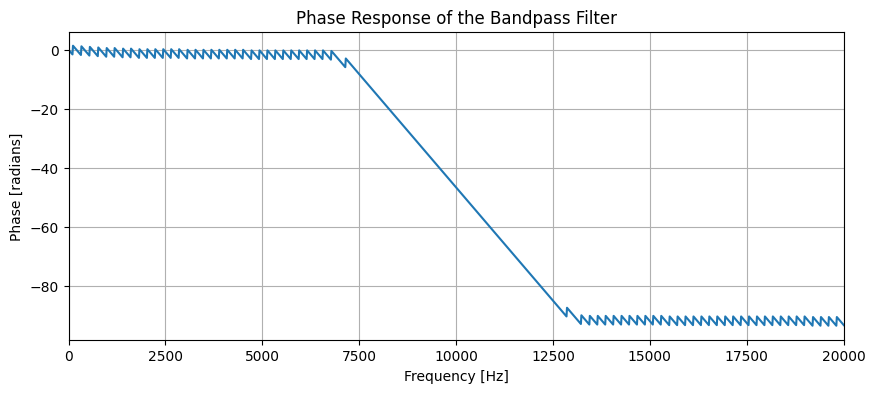

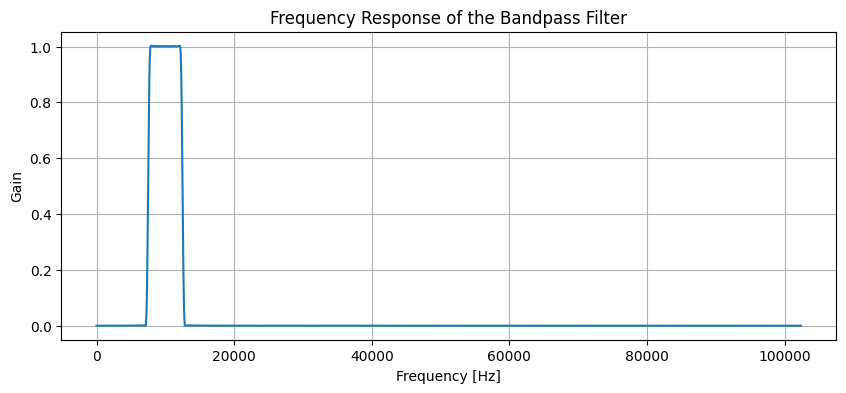

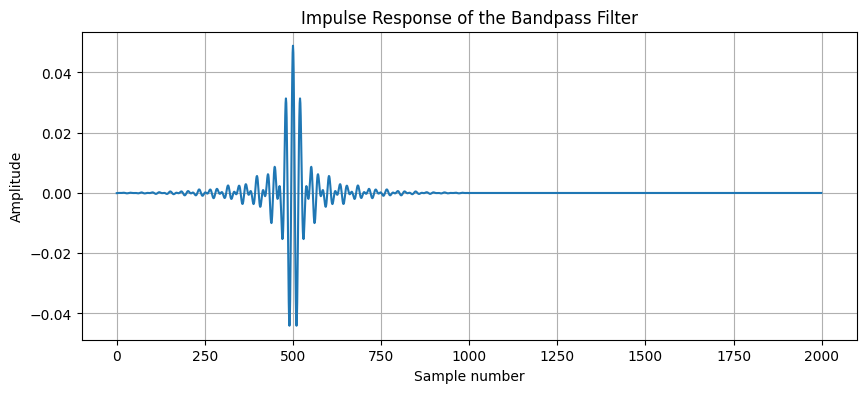

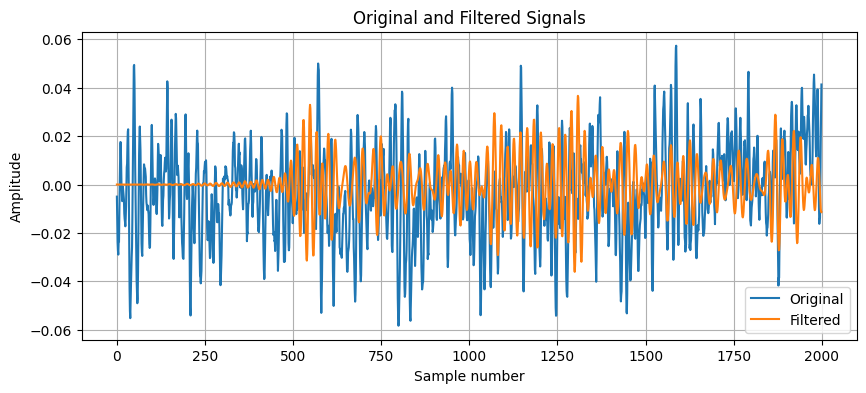

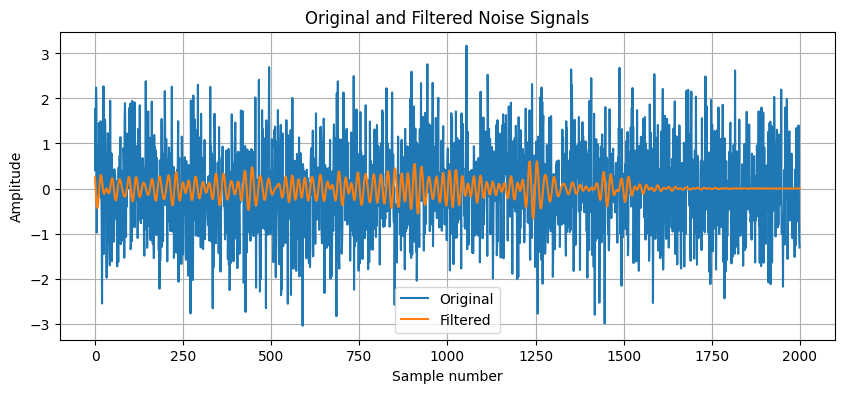

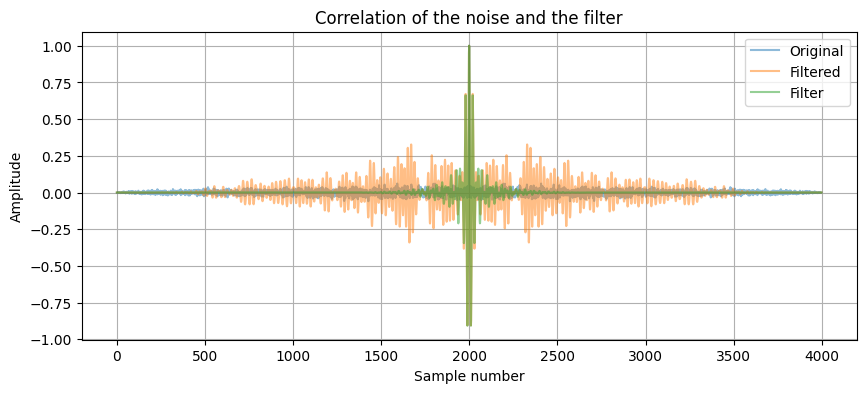

In [70]:



# plotting the phase response of the filter 
w, h = signal.freqz(filter_coefficients, worN=8000)
plt.figure(figsize=(10, 4))
# using unwrap 
plt.plot(0.5 * sampling_rate * w / np.pi, np.unwrap(np.angle(h)), '-')
plt.title('Phase Response of the Bandpass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.xlim(0, 20000)
plt.grid(True)
plt.show()

# Plot the frequency response
w, h = signal.freqz(filter_coefficients, worN=8000)
plt.figure(figsize=(10, 4))
plt.plot(0.5 * sampling_rate * w / np.pi, np.abs(h), '-')   
plt.title('Frequency Response of the Bandpass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid(True)
plt.show()

# Plot the impulse response
plt.figure(figsize=(10, 4))
plt.plot(impulse_response, '-')
plt.title('Impulse Response of the Bandpass Filter')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# convolving the filter with the signal 
filtered_sensor_1 = signal.lfilter(filter_coefficients, 1, sensor_1)
filtered_sensor_2 = signal.lfilter(filter_coefficients, 1, sensor_2)

# Plot the original and filtered signals
plt.figure(figsize=(10, 4))
plt.plot(sensor_1, label='Original')
plt.plot(filtered_sensor_1, label='Filtered')
plt.title('Original and Filtered Signals')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


# Convolvin the filter with gaussian noise 

# Create a Gaussian noise signal
np.random.seed(0)  # Set the random seed for reproducibility
noise = np.random.normal(0, 1, num_samples)

# apply the filter by convolving the noise with the system response
filtered_noise = np.convolve(noise, impulse_response, mode='same')

# Plot the original and filtered noise signals
plt.figure(figsize=(10, 4))
plt.plot(noise, label='Original')
plt.plot(filtered_noise, label='Filtered')
plt.title('Original and Filtered Noise Signals')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots(1,1,figsize = (10,4))

cc_noise = np.correlate(noise, noise, mode='full')
cc_noise = cc_noise / np.max(np.abs(cc_noise))

cc_filtered_noise = np.correlate(filtered_noise, filtered_noise, mode='full')
cc_filtered_noise = cc_filtered_noise / np.max(np.abs(cc_filtered_noise))

cc_filter = np.correlate(impulse_response, impulse_response, mode='full')
cc_filter = cc_filter / np.max(np.abs(cc_filter))


ax.plot(cc_noise, label='Original', alpha=0.5)
ax.plot(cc_filtered_noise, label='Filtered', alpha=0.5)
ax.plot(cc_filter, label='Filter', alpha=0.5)
ax.set_title('Correlation of the noise and the filter')
ax.set_xlabel('Sample number')
ax.set_ylabel('Amplitude')
ax.legend()
ax.grid(True)
plt.show()



#### Looking at the noise
